In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  
import json
import os
from datetime import datetime
# import plotly.graph_objects as go
# from Custom_tools.plotting_utils import plot_ohlc_with_sr

In [2]:
stock_name = "icicibank"
# filename = input("Enter filename in capital letters: ")
filename = "2025_no_validation_XGB"
timeframe = 5
# version = input("Enter you version")

#### Data Wrangling

In [3]:
print(filename)

2025_no_validation_XGB


In [4]:
# columns_to_drop = ["atr","rsi","sma_50","sma_200","sma_20","uptrend","support","resistance"]
columns_to_drop = ['atr', 'support', 'resistance']

In [5]:
# df = pd.read_csv(f"../raw_data_for_machine_learning/{filename}.csv").set_index("datetime").drop(columns=columns_to_drop)
# df.index = pd.to_datetime(df.index)
df = pd.read_csv(f"./{stock_name}/{filename}_{timeframe}.csv").set_index("datetime").drop(columns=columns_to_drop)
df.index = pd.to_datetime(df.index)

In [6]:
df['ml_target'].isna().value_counts()

ml_target
False    148982
Name: count, dtype: int64

In [7]:
df['ml_target_short'].isna().value_counts()

ml_target_short
False    148982
Name: count, dtype: int64

In [8]:
df['ml_target'] = np.where(
    df['ml_target'].isna(), 
    0,
    np.where(df['ml_target'] > 0, 1, -1)
)

df['ml_target_short'] = np.where(
    df['ml_target_short'].isna(), 
    0,
    np.where(df['ml_target_short'] > 0, 1, -1)
)


In [9]:
print(df['ml_target'].value_counts(dropna=False))
print(df['ml_target_short'].value_counts(dropna=False))


ml_target
-1    148185
 1       797
Name: count, dtype: int64
ml_target_short
-1    148504
 1       478
Name: count, dtype: int64


In [10]:
df['ml_target_combined'] = (
    df['ml_target']
    .where(df['ml_target'] != 0, df['ml_target_short'])
)


#### Data Wrangling

In [11]:
# ["ADANIPORTS","AXISBANK","HDFCBANK", "HINDALCO","ICICIBANK", "INFY", "M&M", "RELIANCE", "POWERGRID", "SBIN"]

In [12]:
# df = pd.read_csv(f"../Data/1_minute_data/{filename}").set_index("datetime")
# df.index = pd.to_datetime(df.index)

In [13]:
# df = pd.read_parquet(
#     f"s3://quant-ohlcv-data/ohlcv/timeframe={timeframe}min/symbol={filename}/"
# )
# if "datetime" in df.columns:
#     df = df.set_index("datetime")

In [14]:
# start_date = pd.Timestamp("2023-02-01", tz="Asia/Kolkata")
# end_date   = pd.Timestamp("2025-12-31", tz="Asia/Kolkata")

# df = df.loc[start_date:end_date]

In [15]:
df.head()

,open,high,low,close,volume,ml_target,ml_target_short,prev_close,tr,hour,...,sr_range_atr,resistance_breakout_strength,support_breakdown_strength,resistance_breakout_conviction,support_breakdown_conviction,breakout_volume_ratio,resistance_touch_count,support_touch_count,ml_target_combined,y_pred
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-03 14:20:00+05:30,314.50,314.95,314.45,314.95,86122,-1,-1,314.45,0.50,14,...,1.135135,0.00000,0.0,-1.000000,0.000000,0.675208,8.0,1.0,-1,1
2018-01-03 14:25:00+05:30,314.95,315.00,314.80,314.85,68206,-1,-1,314.95,0.20,14,...,1.155963,0.12844,0.0,0.100000,-1.000000,0.789571,8.0,2.0,-1,1
2018-01-03 14:30:00+05:30,314.90,314.95,314.65,314.90,108359,-1,-1,314.85,0.30,14,...,1.284404,0.00000,0.0,-0.500000,-1.000000,0.674749,8.0,2.0,-1,1
2018-01-03 14:35:00+05:30,314.90,314.90,314.45,314.60,129525,-1,-1,314.90,0.45,14,...,1.333333,0.00000,0.0,-0.166667,-1.000000,1.082609,8.0,2.0,-1,1
2018-01-03 14:40:00+05:30,314.60,314.85,314.30,314.80,154232,1,-1,314.60,0.55,14,...,1.359223,0.00000,0.0,-0.777778,-0.333333,1.412418,8.0,3.0,1,1


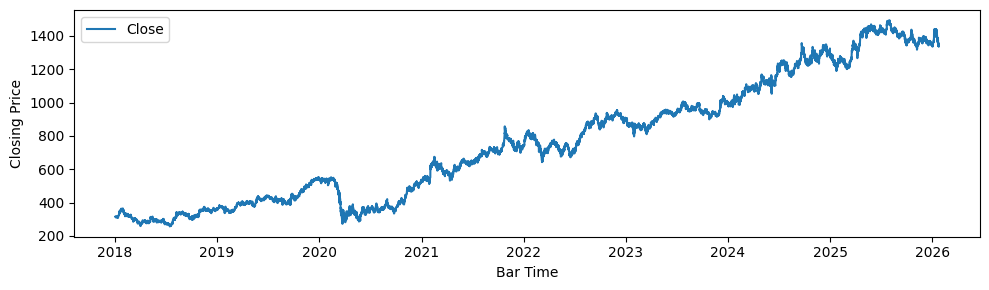

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(df["close"], label="Close")

ax.set_xlabel("Bar Time")
ax.set_ylabel("Closing Price")

plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df["resistance"] = df["close"].shift().rolling(10).max()
df["support"]    = df["close"].shift().rolling(10).min()

df= df.dropna(how="any")


In [18]:
df[["close","support","resistance"]].head()

,close,support,resistance
datetime,,,
2018-01-03 15:10:00+05:30,315.05,314.6,315.45
2018-01-03 15:15:00+05:30,315.00,314.6,315.45
2018-01-03 15:20:00+05:30,314.85,314.6,315.45
2018-01-03 15:25:00+05:30,314.85,314.6,315.45
2018-01-03 15:30:00+05:30,314.90,314.8,315.45


In [19]:
# plot_ohlc_with_sr(df.tail(75))

In [20]:
df[["close", "high", "low", "support", "resistance"]].head()

,close,high,low,support,resistance
datetime,,,,,
2018-01-03 15:10:00+05:30,315.05,315.50,314.75,314.6,315.45
2018-01-03 15:15:00+05:30,315.00,315.05,314.60,314.6,315.45
2018-01-03 15:20:00+05:30,314.85,315.35,314.65,314.6,315.45
2018-01-03 15:25:00+05:30,314.85,315.10,314.45,314.6,315.45
2018-01-03 15:30:00+05:30,314.90,314.95,314.60,314.8,315.45


    ATR implementation for stop loss

In [21]:
# Calculate True Range (Wilder's definition)
df['prev_close'] = df['close'].shift(1)
df['tr'] = df[['high', 'low', 'prev_close']].apply(
    lambda x: max(x['high'] - x['low'], 
                      abs(x['high'] - x['prev_close']), 
                                        abs(x['low'] - x['prev_close'])), axis=1
                                        )
df['atr'] = df['tr'].shift().rolling(14).mean()

#### Indicators as filter

In [22]:
# Calculate RSI (14-period standard)
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI
df['rsi'] = calculate_rsi(df['close'], period=14).shift()  # shift to avoid lookahead


#### Creating Strategy

    Adding a trend filter.

In [23]:
# Add simple trend filter
df['sma_50'] = df['close'].shift().rolling(50).mean()
df['sma_200'] = df['close'].shift().rolling(200).mean()
df["sma_20"] = df["close"].shift().rolling(20).mean() 

# Uptrend: price > SMA50 > SMA200
df['uptrend'] = (
                 (df['sma_50'] > df['sma_200']) &
                 (df["close"]>df["sma_20"])
                 ).astype(int)

df["downtrend"] = ( 
                 (df['sma_50']< df['sma_200']) &
                 (df["close"]<df["sma_20"])
                 ).astype(int)


    Calculating Entry Signal 

In [24]:
df['entry_signal'] = (
    (df['low'] <= df['support']) &
    (df['rsi'] > 35) &
    (df['rsi'] < 55) &
    (df['uptrend'] == 1)
    & (df['y_pred'] == 1)
).astype(int)


    Calculating Entry Price

In [25]:
df["entry_price"] = np.where(df["entry_signal"]==1, df["support"], np.nan)

    Calculating Exit conditions

In [26]:
df["target_price"] = np.where(df["entry_signal"]==1, df["resistance"], np.nan )

df["stop_loss_price"] = np.where(df["entry_signal"]==1, df["entry_price"]-(1 * df["atr"]), np.nan)

#### Creating positions

    Initializing variables

#### Creating Long Positions

In [27]:
#INitializing trade pnl logic
df["trade_pnl"] = 0.0
df["exit_reason"] = ''
df["in_position"] = 0
trade_pnls = []
starting_capital = df.iloc[0]['close']
# starting_capital = 10000


entry_price = np.nan
stop_price = np.nan
target_price = np.nan
in_trade = False
TRANSACTION_COST = 0.0002

#For machine Learning
entry_index = None
df["ml_target"] =  np.nan
df["holding_period"] = np.nan

In [28]:
for i in range(len(df)):
    idx = df.index[i]

    #Mark if we are in position in this bar

    df.loc[idx, "in_position"] = 1 if  in_trade else 0


    #Exit logic first

    if in_trade:
        current_low = df.loc[idx, "low"]
        current_high = df.loc[idx, "high"]

        #Exit conditions
        if current_low<= stop_price:
            exit_price = stop_price
            exit_reason = "STOP" 
        elif current_high >= target_price:
            exit_price = target_price
            exit_reason = "TARGET"
        else:
            exit_price = None
        #Calculating PNL
        if exit_price is not None:
            pnl_per_share_gross = exit_price - entry_price
            
            #Calculating transaction cost
            cost_entry_per_share = entry_price * TRANSACTION_COST
            cost_exit_per_share = exit_price * TRANSACTION_COST
            total_cost_per_share = cost_entry_per_share + cost_exit_per_share

            pnl_per_share_net = pnl_per_share_gross - total_cost_per_share

            #Calculate position size
            # position_value = starting_capital
            # shares = position_value/entry_price
            shares = 1

            #Total pnl for the position
            pnl_total_gross = pnl_per_share_gross * shares
            total_cost_total = total_cost_per_share * shares
            pnl_total_net = pnl_per_share_net * shares

            trade_pnls.append(pnl_total_net)

            # Assign to dataframe at exit bar

            df.loc[idx, 'trade_pnl'] =  pnl_total_net
            df.loc[idx, 'exit_reason'] = exit_reason
            # Use percentage return (comparable across stocks):
            df.loc[entry_index, 'ml_target'] = (pnl_per_share_net / entry_price) * 100
            df.loc[entry_index, "holding_period"] = i - df.index.get_loc(entry_index)


            #Reset state

            in_trade = False
            entry_price = np.nan
            stop_price = np.nan
            target_price = np.nan
    
    #Entry logic
    elif df.loc[idx, "entry_signal"] == 1:
        in_trade = True
        entry_price = df.loc[idx, "entry_price"]
        stop_price = df.loc[idx, "stop_loss_price"]
        target_price = df.loc[idx, "target_price"]

        entry_index = idx

 

In [29]:
np.sum(trade_pnls)

np.float64(1021.4302492857137)

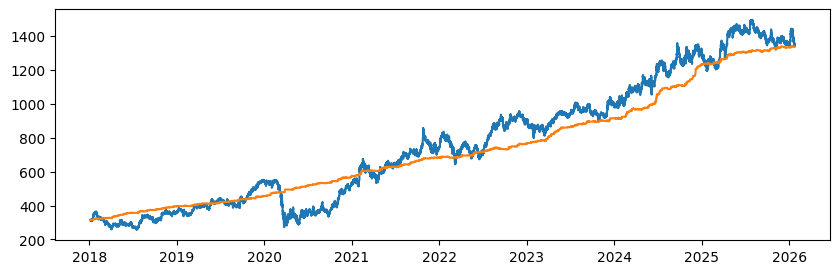

In [30]:
df["cumulative_pnl"] = df["trade_pnl"].cumsum()
df["equity_curve"] = starting_capital + df["cumulative_pnl"]

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df["close"])
ax.plot(df["equity_curve"])

In [31]:
df['ml_target'].values

array([nan, nan, nan, ..., nan, nan, nan], shape=(148972,))

In [32]:
df['ml_target'].notna().sum()

np.int64(1108)

In [33]:
df['ml_target'].isna().sum()

np.int64(147864)

In [34]:
# Add this right after your loop
print(f"\nTotal trades executed: {len(trade_pnls)}")
print(f"ML targets stored: {df['ml_target'].notna().sum()}")
print(f"Entry signals: {(df['entry_signal'] == 1).sum()}")


Total trades executed: 1108
ML targets stored: 1108
Entry signals: 1380


#### Adding shorting opportunities

In [35]:
df['entry_signal_short'] = (
    (df['high'] >= df['resistance']) &
    (df['rsi'] > 50) &  # Price showing strength/overbought
    (df['rsi'] < 70)   # But not extremely overbought
    & (df['downtrend'] == 1)
    & (df['y_pred'] == 1)
).astype(int)

In [36]:
# Entry at close when price touches resistance
df["entry_price_short"] = np.where(df["entry_signal_short"]==1, 
                                    df["resistance"], 
                                    np.nan)

In [37]:

df["target_price_short"] = np.where(df["entry_signal_short"]==1, 
                                    df["support"],  # or df["close"] - (2 * df["atr"])
                                    np.nan)

# Stop ABOVE entry (correct - you have this right!)
df["stop_loss_price_short"] = np.where(df["entry_signal_short"]==1, 
                                       df["entry_price_short"] + (1 * df["atr"]), 
                                       np.nan)

In [38]:
# Initializing trade pnl logic for SHORTS
df["trade_pnl_short"] = 0.0
df["exit_reason_short"] = ''
df["in_position_short"] = 0
trade_pnls_short = []
starting_capital_short = df.iloc[0]['close']
# starting_capital_short = 10000

entry_price_short = np.nan
stop_price_short = np.nan
target_price_short = np.nan
in_trade_short = False
TRANSACTION_COST_SHORT = 0.0002  # Consider if shorts have higher costs

# For machine learning
entry_index_short = None
df["ml_target_short"] = np.nan
df["holding_period_short"] = np.nan

In [39]:
for i in range(len(df)):
    idx = df.index[i]

    # Mark if we are in position in this bar
    df.loc[idx, "in_position_short"] = 1 if in_trade_short else 0

    # Exit logic first
    if in_trade_short:
        current_low = df.loc[idx, "low"]
        current_high = df.loc[idx, "high"]

        # Exit conditions (INVERTED for shorts)
        if current_high >= stop_price_short:  # Stop hit when price goes UP
            exit_price = stop_price_short
            exit_reason = "STOP" 
        elif current_low <= target_price_short:  # Target hit when price goes DOWN
            exit_price = target_price_short
            exit_reason = "TARGET"
        else:
            exit_price = None
            
        # Calculating PNL
        if exit_price is not None:
            # INVERTED: profit when exit < entry for shorts
            pnl_per_share_gross = entry_price_short - exit_price  
            
            # Calculating transaction cost
            cost_entry_per_share = entry_price_short * TRANSACTION_COST_SHORT
            cost_exit_per_share = exit_price * TRANSACTION_COST_SHORT
            total_cost_per_share = cost_entry_per_share + cost_exit_per_share

            pnl_per_share_net = pnl_per_share_gross - total_cost_per_share

            # Calculate position size
            # position_value = starting_capital_short
            # shares = position_value / entry_price_short
            shares = 1

            # Total pnl for the position
            pnl_total_gross = pnl_per_share_gross * shares
            total_cost_total = total_cost_per_share * shares
            pnl_total_net = pnl_per_share_net * shares

            trade_pnls_short.append(pnl_total_net)

            # Assign to dataframe at exit bar
            df.loc[idx, 'trade_pnl_short'] = pnl_total_net
            df.loc[idx, 'exit_reason_short'] = exit_reason
            
            # Use percentage return (comparable across stocks):
            df.loc[entry_index_short, 'ml_target_short'] = (pnl_per_share_net / entry_price_short) * 100
            df.loc[entry_index_short, "holding_period_short"] = i - df.index.get_loc(entry_index_short)

            # Reset state
            in_trade_short = False
            entry_price_short = np.nan
            stop_price_short = np.nan
            target_price_short = np.nan
    
    # Entry logic
    elif (df.loc[idx, "entry_signal_short"] == 1) and (not in_trade_short):

        in_trade_short = True
        entry_price_short = df.loc[idx, "entry_price_short"]
        stop_price_short = df.loc[idx, "stop_loss_price_short"]
        target_price_short = df.loc[idx, "target_price_short"]
        
        entry_index_short = idx

In [40]:
df["ml_target_short"].notna().sum()

np.int64(645)

In [41]:
df["ml_target_short"].isna().sum()

np.int64(148327)

In [42]:
np.sum(trade_pnls_short)

np.float64(638.2863450000002)

In [43]:
df["trade_pnl_total"] = df["trade_pnl"] + df["trade_pnl_short"]


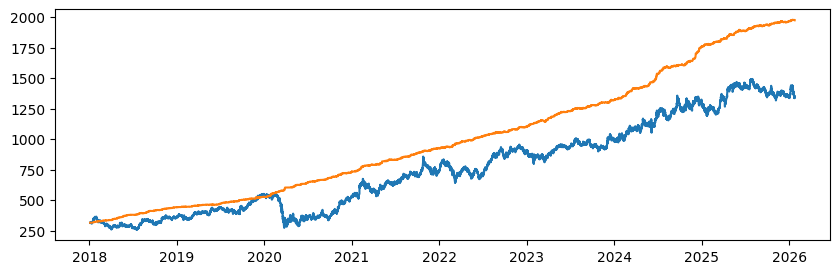

In [44]:
df["cumulative_pnl"] = df["trade_pnl_total"].cumsum()
df["equity_curve"] = starting_capital + df["cumulative_pnl"]

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df["close"])
ax.plot(df["equity_curve"])

#### Year On Year Results

YEAR-ON-YEAR PERFORMANCE
 year  Start Equity  End Equity  Total Return (%)  Max Drawdown (%)  Trades  Win Rate (%)  Avg Win  Avg Loss  Sharpe Ratio
 2018    315.050000  441.912931         40.267555         -0.873831   200.0     78.000000 1.050892 -0.842641      0.929951
 2019    441.912931  528.534391         19.601477         -0.647145   186.0     70.967742 1.087973 -1.055388      0.584129
 2020    528.534391  735.038344         39.071053         -0.616201   184.0     75.543478 1.910514 -1.312390      0.805611
 2021    735.038344  924.586568         25.787529         -0.751848   200.0     68.500000 2.156883 -1.681662      0.684593
 2022    924.586568 1102.332649         19.224385         -0.627839   196.0     68.877551 2.133435 -1.807667      0.612743
 2023   1102.332649 1320.845594         19.822777         -1.040903   255.0     72.156863 1.904470 -1.857881      0.749619
 2024   1320.845594 1764.118435         33.559777         -0.845506   268.0     77.611940 2.877620 -2.587869      

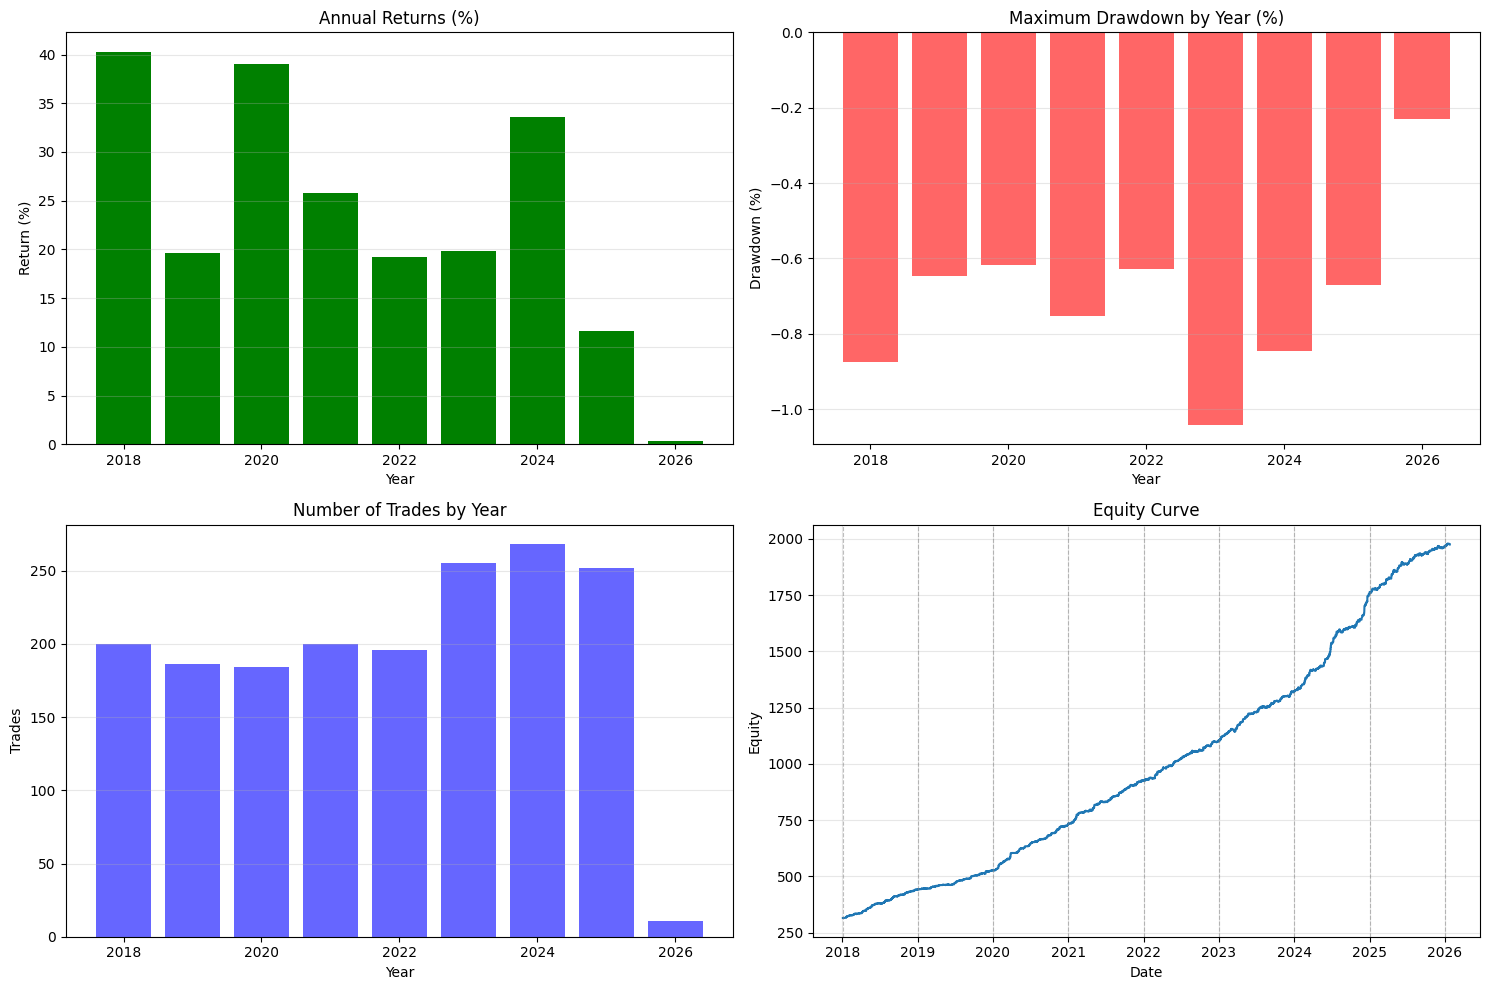

,year,Start Equity,End Equity,Total Return (%),Max Drawdown (%),Trades,Win Rate (%),Avg Win,Avg Loss,Sharpe Ratio
0,2018,315.050000,441.912931,40.267555,-0.873831,200.0,78.000000,1.050892,-0.842641,0.929951
1,2019,441.912931,528.534391,19.601477,-0.647145,186.0,70.967742,1.087973,-1.055388,0.584129
2,2020,528.534391,735.038344,39.071053,-0.616201,184.0,75.543478,1.910514,-1.312390,0.805611
3,2021,735.038344,924.586568,25.787529,-0.751848,200.0,68.500000,2.156883,-1.681662,0.684593
4,2022,924.586568,1102.332649,19.224385,-0.627839,196.0,68.877551,2.133435,-1.807667,0.612743
5,2023,1102.332649,1320.845594,19.822777,-1.040903,255.0,72.156863,1.904470,-1.857881,0.749619
6,2024,1320.845594,1764.118435,33.559777,-0.845506,268.0,77.611940,2.877620,-2.587869,0.906032
7,2025,1764.118435,1968.963927,11.611777,-0.669350,252.0,69.047619,2.292042,-2.486792,0.554425
8,2026,1968.963927,1974.766594,0.294707,-0.231228,11.0,72.727273,1.777938,-2.806944,0.354134


In [45]:
df['year'] = df.index.year

# Group by year and calculate metrics
def calculate_year_metrics(group):
    # Equity metrics
    start_equity = group['equity_curve'].iloc[0]
    end_equity = group['equity_curve'].iloc[-1]
    year_return = (end_equity - start_equity) / start_equity * 100
    
    # Drawdown
    running_max = group['equity_curve'].cummax()
    drawdown = (group['equity_curve'] - running_max) / running_max * 100
    max_drawdown = drawdown.min()
    
    # Trade metrics
    trades = group[group['trade_pnl_total'] != 0]
    num_trades = len(trades)
    winning_trades = len(trades[trades['trade_pnl_total'] > 0])
    losing_trades = len(trades[trades['trade_pnl_total'] < 0])
    win_rate = (winning_trades / num_trades * 100) if num_trades > 0 else 0
    
    # Average win/loss
    avg_win = trades[trades['trade_pnl_total'] > 0]['trade_pnl_total'].mean() if winning_trades > 0 else 0
    avg_loss = trades[trades['trade_pnl_total'] < 0]['trade_pnl_total'].mean() if losing_trades > 0 else 0
    
    # Sharpe ratio
    daily_returns = group['equity_curve'].pct_change().dropna()
    sharpe = np.sqrt(252) * daily_returns.mean() / daily_returns.std() if len(daily_returns) > 1 and daily_returns.std() > 0 else 0
    
    return pd.Series({
        'Start Equity': start_equity,
        'End Equity': end_equity,
        'Total Return (%)': year_return,
        'Max Drawdown (%)': max_drawdown,
        'Trades': num_trades,
        'Win Rate (%)': win_rate,
        'Avg Win': avg_win,
        'Avg Loss': avg_loss,
        'Sharpe Ratio': sharpe
    })

# Apply to all years at once
yearly_df = df.groupby('year').apply(calculate_year_metrics).reset_index()

# Calculate overall CAGR
first_equity = df['equity_curve'].iloc[0]
last_equity = df['equity_curve'].iloc[-1]
years_total = (df.index[-1] - df.index[0]).days / 365.25
cagr = ((last_equity / first_equity) ** (1 / years_total) - 1) * 100

# Overall max drawdown
running_max_all = df['equity_curve'].cummax()
drawdown_all = (df['equity_curve'] - running_max_all) / running_max_all * 100
max_dd_all = drawdown_all.min()

print("=" * 80)
print("YEAR-ON-YEAR PERFORMANCE")
print("=" * 80)
print(yearly_df.to_string(index=False))
print("\n" + "=" * 80)
print("OVERALL METRICS")
print("=" * 80)
print(f"Starting Capital: ₹{first_equity:,.2f}")
print(f"Ending Capital: ₹{last_equity:,.2f}")
print(f"Total Return: {((last_equity/first_equity - 1) * 100):.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Max Drawdown: {max_dd_all:.2f}%")
print(f"Total Period: {years_total:.2f} years")
print("=" * 80)

# Same visualizations as before
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].bar(yearly_df['year'], yearly_df['Total Return (%)'], 
               color=['green' if x > 0 else 'red' for x in yearly_df['Total Return (%)']])
axes[0, 0].set_title('Annual Returns (%)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

axes[0, 1].bar(yearly_df['year'], yearly_df['Max Drawdown (%)'], color='red', alpha=0.6)
axes[0, 1].set_title('Maximum Drawdown by Year (%)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Drawdown (%)')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].bar(yearly_df['year'], yearly_df['Trades'], color='blue', alpha=0.6)
axes[1, 0].set_title('Number of Trades by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Trades')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].plot(df.index, df['equity_curve'], linewidth=1.5)
axes[1, 1].set_title('Equity Curve')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Equity')
axes[1, 1].grid(alpha=0.3)

for year in yearly_df['year'].unique():
    year_start = df[df['year'] == year].index[0]
    axes[1, 1].axvline(x=year_start, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.tight_layout()
plt.show()

yearly_df

In [46]:
# Then in the save section:
results = {
    'metadata': {
        'filename': filename,
        'timeframe': timeframe,
        'timestamp': datetime.now().isoformat(),
        'total_period_years': years_total,
        'starting_capital': first_equity,
        'ending_capital': last_equity,
        'total_return_pct': ((last_equity/first_equity - 1) * 100),
        'cagr_pct': cagr,
        'max_drawdown_pct': max_dd_all
    },
    'yearly_performance': yearly_df.to_dict(orient='records')
}

key = f"{filename}_{timeframe}"

json_filepath = f'./research_results/{stock_name}.json'

if os.path.exists(json_filepath):
    with open(json_filepath, 'r') as f:
        all_results = json.load(f)
else:
    all_results = {}

all_results[key] = results

with open(json_filepath, 'w') as f:
    json.dump(all_results, f, indent=2)

print(f"✓ Results saved with key: {key}")
print(f"✓ Total runs in file: {len(all_results)}")

✓ Results saved with key: 2025_no_validation_XGB_5
✓ Total runs in file: 1


#### Sanity Check

In [47]:
required_columns = ['open', 'high', 'low', 'close', 'volume', 'resistance', 'support','atr', 'rsi', 'sma_50', 'sma_200', 'sma_20','uptrend','ml_target', 'ml_target_short']
df = df[required_columns]
df.head()

,open,high,low,close,volume,resistance,support,atr,rsi,sma_50,sma_200,sma_20,uptrend,ml_target,ml_target_short
datetime,,,,,,,,,,,,,,,
2018-01-03 15:10:00+05:30,315.45,315.50,314.75,315.05,143510,315.45,314.6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:15:00+05:30,315.00,315.05,314.60,315.00,190798,315.45,314.6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:20:00+05:30,314.85,315.35,314.65,314.85,284381,315.45,314.6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:25:00+05:30,314.85,315.10,314.45,314.85,191466,315.45,314.6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-01-03 15:30:00+05:30,314.85,314.95,314.60,314.90,126045,315.45,314.8,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [48]:
# required_columns = ['open', 'high', 'low', 'close', 'volume', 'resistance', 'support','atr', 'rsi', 'sma_50', 'sma_200', 'sma_20','uptrend','downtrend']
# df = df[required_columns]
# df.head()

In [49]:
# df.to_csv(f"./raw_data_for_machine_learning/{filename}.csv", index='datetime')

In [50]:
df["ml_target"].notna().sum()

np.int64(1108)

In [51]:
df["ml_target"].value_counts()

ml_target
 0.129257    2
 0.199591    2
 0.106706    2
 0.182363    2
 0.244211    2
            ..
 0.095002    1
 0.130275    1
 0.219816    1
 0.196903    1
-0.204579    1
Name: count, Length: 1100, dtype: int64

In [52]:
df["ml_target_short"].notna().sum()

np.int64(645)

In [53]:
df["ml_target_short"].value_counts()

ml_target_short
 0.180586    2
 0.334657    2
 0.193887    2
 0.003224    1
 0.659950    1
            ..
 0.220236    1
 0.019709    1
 0.173414    1
 0.121731    1
-0.252270    1
Name: count, Length: 642, dtype: int64

In [54]:
df[df["ml_target_short"] == 1]["ml_target_short"]

Series([], Name: ml_target_short, dtype: float64)